# **`Import Libraries`**

In [ ]:
import numpy as np          
import pandas as pd              
import matplotlib.pyplot as plt  
from IPython import display
import random
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
# configure notebook to display plots
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# Load Data

In [ ]:
df = pd.read_csv(r'/gdrive/MyDrive/MSCDiss/cars_news.csv',index_col='ID',dtype={'ID':np.int64})

# Data Analysis

print the first five row of data

In [ ]:
df=df.drop('Unnamed: 0',axis=1)
df = df.rename(columns={'NEWS': 'NEWS2'})
df.head()

admin_date        disch_date  died  died_new  male  age  \
ID                                                                             
1009930000000  05/01/2020 13:00  07/01/2020 13:45     0         0     0   79   
1009930000000  05/01/2020 13:00  07/01/2020 13:45     0         0     0   79   
1009930000000  05/01/2020 13:00  07/01/2020 13:45     0         0     0   79   
1009930000000  05/01/2020 13:00  07/01/2020 13:45     0         0     0   79   
1009930000000  05/01/2020 13:00  07/01/2020 13:45     0         0     0   79   

                    los         news_date  NEWS2  NEWS1      CARS  subindex_n  \
ID                                                                              
1009930000000  2.031313  05/01/2020 13:32      1      1  0.030235           1   
1009930000000  2.031313  05/01/2020 17:15      3      3  0.049313           2   
1009930000000  2.031313  05/01/2020 18:36      2      2  0.036648           3   
1009930000000  2.031313  05/01/2020 23:11      1      1  0.034234           4   
1009930000000  2.031313  06/01/2020 02:26      0      0  0.022482           5   

               submax_n  
ID                       
1009930000000        13  
1009930000000        13  
1009930000000        13  
1009930000000        13  
1009930000000        13

Use **.info()** to find the datatype and count of each columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68551 entries, 1009930000000 to 975090000000
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   admin_date  68551 non-null  object 
 1   disch_date  68551 non-null  object 
 2   died        68551 non-null  int64  
 3   died_new    68551 non-null  int64  
 4   male        68551 non-null  int64  
 5   age         68551 non-null  int64  
 6   los         68551 non-null  float64
 7   news_date   68520 non-null  object 
 8   NEWS2       68551 non-null  int64  
 9   NEWS1       68551 non-null  int64  
 10  CARS        68551 non-null  float64
 11  subindex_n  68551 non-null  int64  
 12  submax_n    68551 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 7.3+ MB


Find min, max ,standarad derivation to get the range  of each column  

In [ ]:
df.describe()

died      died_new          male           age           los  \
count  68551.000000  68551.000000  68551.000000  68551.000000  68551.000000   
mean       0.081793      0.001692      0.471780     73.097752      9.986411   
std        0.274051      0.041101      0.499207     16.417485      6.858832   
min        0.000000      0.000000      0.000000     18.000000      1.002761   
25%        0.000000      0.000000      0.000000     65.000000      4.478293   
50%        0.000000      0.000000      0.000000     76.000000      8.061535   
75%        0.000000      0.000000      1.000000     85.000000     14.689470   
max        1.000000      1.000000      1.000000    103.000000     27.892243   

             NEWS2         NEWS1          CARS    subindex_n      submax_n  
count  68551.00000  68551.000000  68551.000000  68551.000000  68551.000000  
mean       1.81516      1.102201      0.056433     25.221281     49.442561  
std        2.13436      1.640995      0.077444     24.741535     35.007571  
min        0.00000      0.000000      0.000243      1.000000      1.000000  
25%        0.00000      0.000000      0.015347      8.000000     25.000000  
50%        1.00000      0.000000      0.033097     18.000000     40.000000  
75%        3.00000      2.000000      0.065894     34.000000     65.000000  
max       18.00000     15.000000      0.931999    195.000000    195.000000

find number of null value 

In [ ]:
df.isnull().sum()

admin_date     0
disch_date     0
died           0
died_new       0
male           0
age            0
los            0
news_date     31
NEWS2          0
NEWS1          0
CARS           0
subindex_n     0
submax_n       0
dtype: int64

Replace the null value with 0

In [ ]:
df= df.fillna(0)
df.isnull().sum()

admin_date    0
disch_date    0
died          0
died_new      0
male          0
age           0
los           0
news_date     0
NEWS2         0
NEWS1         0
CARS          0
subindex_n    0
submax_n      0
dtype: int64

Use **.unique()** to get the total number of unique patient in hospital and the number of survival and non survival.
 

In [ ]:
print('Number of patient ' + str(len(df.index.unique())))
print('Number of Alive: ' + str(len(df[df['died']==0].index.unique())))
print('Number of Died: ' + str(len(df[df['died']==1].index.unique())))
print('Mortality: ' + str(round(100*len(df[df['died']==1].index.unique()) / len(df.index.unique()),1)) + '%')
print()

Number of patient 1649
Number of Alive: 1567
Number of Died: 111
Mortality: 6.7%



Rename the **male** column to **gender**

In [ ]:
df = df.rename(columns={'male': 'gender'})

# **Visualization**

visualize the distribution of died column.
0 mean alive
1 mean died

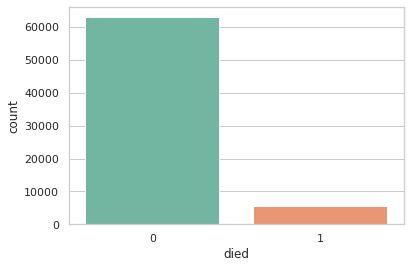

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='died', data=df, palette='Set2')
plt.show()

Text(0.5, 1.0, 'NEWS1 > 5')

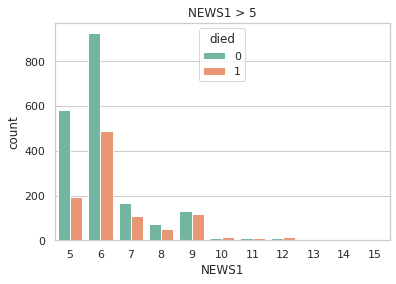

In [ ]:

df1= df.loc[df['NEWS1'] >= 5 ] 
# df2= df.loc[df['NEWS'] > 5 ] 

lm = sns.countplot(x='NEWS1',hue='died',data=df1,palette='Set2')
ax1 =lm.axes
ax1=plt.gca()
ax1.set_title('NEWS1 > 5')


Text(0.5, 1.0, 'NEWS2 >= 5')

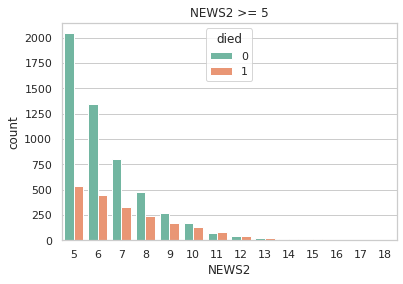

In [ ]:
df2= df.loc[df['NEWS2'] >= 5 ] 

lm = sns.countplot(x='NEWS2',hue='died',data=df2,palette='Set2')
ax1 =lm.axes
ax1=plt.gca()
ax1.set_title('NEWS2 >= 5')

# Select Variables

In [ ]:
var1=['gender',	'age'	,'los','NEWS1','NEWS2','CARS']
variables = var1.copy()
variables.append('died')

**Heat map**

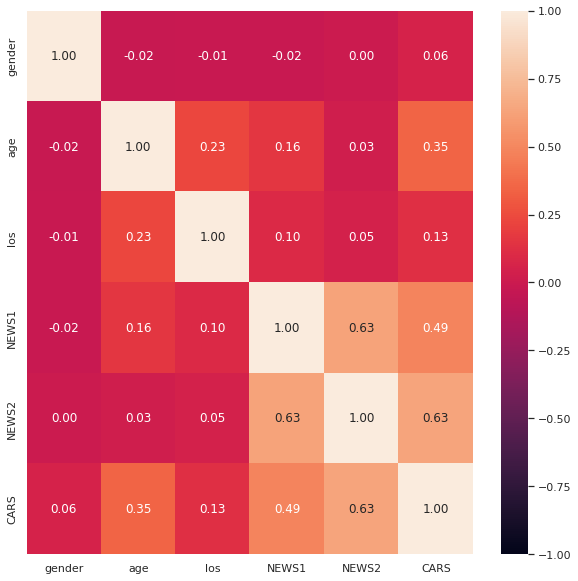

In [ ]:
corr = df[var1].corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True,fmt = ".2f", vmin = -1.00, vmax = 1.00)

**Outliers**

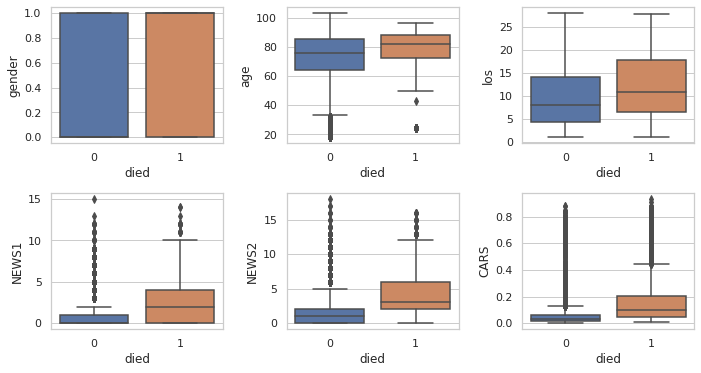

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
count = 0
for variable in var1:
    count += 1
    plt.subplot(4, 3, count)
    
    ax = sns.boxplot(x = 'died', y=variable, data=df)


fig.tight_layout()
plt.show()

In [ ]:
var=['los','NEWS1','subindex_n','submax_n','NEWS2']
variables = var.copy()
variables.append('died')

# Data preparation

As we take all the measurements against every unique ID. So, we need to summarize the feature for that apply feature construction to get one row against each ID.
Take the 'max', 'min', 'std', and 'mean' using the 'group by' function to aggregate data.


In [ ]:
def feature(data):
    data_max = df.groupby(['ID'])[var].max()
    data_max.columns = ['max ' + str(col) for col in data_max.columns]

    data_min = df.groupby(['ID'])[var].min()
    data_min.columns = ['min ' + str(col) for col in data_min.columns]
    
    data_std = df.groupby(['ID'])[var].std()
    data_std.columns = ['sd ' + str(col) for col in data_std.columns]

    data_mean = df.groupby(['ID'])[var].mean()
    data_mean.columns = ['mean ' + str(col) for col in data_mean.columns]

    data_agg = pd.concat([data_min,data_max,data_std,data_mean],axis=1)
    
    return data_agg

dt=feature(df).dropna(axis=0)
print('Extracted features: ')
display.display(dt.columns)
print('')
print('Total number of patient: '+str(dt.shape[0]))
print('Number of features: ' + str(dt.shape[1]))
    

Extracted features: 


Index(['min los', 'min NEWS1', 'min subindex_n', 'min submax_n', 'min NEWS2',
       'max los', 'max NEWS1', 'max subindex_n', 'max submax_n', 'max NEWS2',
       'sd los', 'sd NEWS1', 'sd subindex_n', 'sd submax_n', 'sd NEWS2',
       'mean los', 'mean NEWS1', 'mean subindex_n', 'mean submax_n',
       'mean NEWS2'],
      dtype='object')


Total number of patient: 1645
Number of features: 20


Now DataFrame containing one row per ID. Next, we are going to add the age and gender to the dataset.

In [ ]:
died = df.loc[dt.index]['died'].groupby(['ID']).max()
age = df.loc[dt.index]['age'].groupby(['ID']).max()
gender = df.loc[dt.index]['gender'].groupby(['ID']).max()

data_concat = pd.concat([dt, age, gender, died], axis=1).dropna(axis=0)
print('Total number of patient : ' + str(data_concat.shape[0]))
print('Number of features: ' + str(data_concat.shape[1]))

Total number of patient : 1645
Number of features: 23


# NEWS1

Divide the data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X=data_concat.drop(['died','min NEWS2','mean NEWS2', 'max NEWS2', 'sd NEWS2', ], axis='columns')
y=data_concat.died
# set the value for test set
test_size = 0.2

# Divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = 42)

In [ ]:
X_train.shape

(1316, 18)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame( scaler.fit_transform(X_train))
X_test =pd.DataFrame( scaler.fit_transform(X_test))

In [ ]:
X_train = np.array(X_train)
X_test=np.array(X_test) 
x_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
x_train.shape

(1316, 1, 18)

In [ ]:
X_test.shape

(329, 18)

In [ ]:
print('Before reshape',X_train.shape)
print('After reshape',x_train.shape)

Before reshape (1316, 18)
After reshape (1316, 1, 18)


# MODEL

In [ ]:
lst = Sequential() 

# input layer 
lst.add(LSTM(units=50, return_sequences=True, input_shape=(1,x_train.shape[2])))
#output layer 
lst.add(Dense(1, activation='sigmoid'))
# defining loss function, optimizer, metrics 
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lst.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             13800     
                                                                 
 dense (Dense)               (None, 1, 1)              51        
                                                                 
Total params: 13,851
Trainable params: 13,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# training the model on training dataset
history_lst =lst.fit(x_train, y_train, epochs=30, batch_size=64,validation_split=0.2)

x_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')


Epoch 1/30
17/17 [==============================] - 4s 69ms/step - loss: 0.6553 - accuracy: 0.7025 - val_loss: 0.6196 - val_accuracy: 0.8485
Epoch 2/30
17/17 [==============================] - 0s 12ms/step - loss: 0.5796 - accuracy: 0.8536 - val_loss: 0.5481 - val_accuracy: 0.8902
Epoch 3/30
17/17 [==============================] - 0s 10ms/step - loss: 0.5053 - accuracy: 0.8821 - val_loss: 0.4757 - val_accuracy: 0.8939
Epoch 4/30
17/17 [==============================] - 0s 10ms/step - loss: 0.4341 - accuracy: 0.9040 - val_loss: 0.4131 - val_accuracy: 0.9091
Epoch 5/30
17/17 [==============================] - 0s 10ms/step - loss: 0.3762 - accuracy: 0.9116 - val_loss: 0.3622 - val_accuracy: 0.9053
Epoch 6/30
17/17 [==============================] - 0s 15ms/step - loss: 0.3299 - accuracy: 0.9192 - val_loss: 0.3256 - val_accuracy: 0.9091
Epoch 7/30
17/17 [==============================] - 0s 10ms/step - loss: 0.2970 - accuracy: 0.9202 - val_loss: 0.2988 - val_accuracy: 0.9129
Epoch 8/30
17

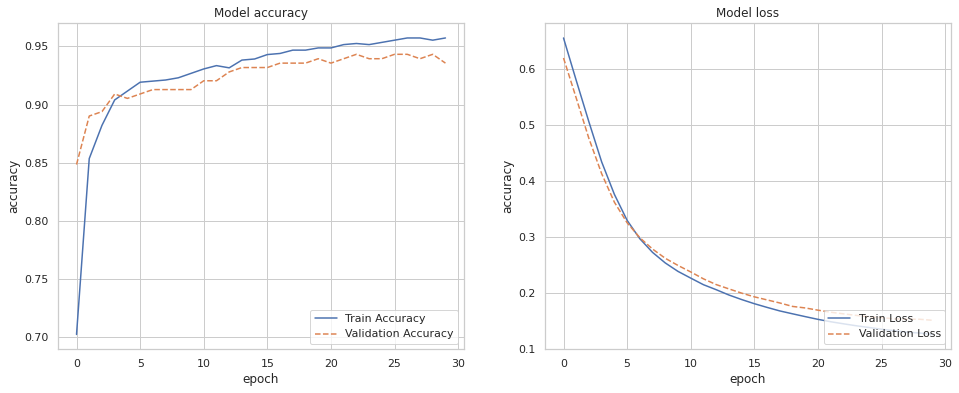

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,6))
axes[0].plot(history_lst.history['accuracy'])
axes[0].plot(history_lst.history['val_accuracy'],'--')
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')

axes[1].plot(history_lst.history['loss'])
axes[1].plot(history_lst.history['val_loss'],"--")
axes[1].set_title('Model loss')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['Train Loss', 'Validation Loss'], loc='lower right')

In [ ]:
PD = lst.predict(x_test)
PD=PD.reshape(-1)


11/11 [==============================] - 1s 2ms/step


In [ ]:

from sklearn import metrics
news_fpr, news_tpr, thresholds = metrics.roc_curve( y_test, PD)
auc_news=metrics.auc(news_fpr, news_tpr)
print('ACU:',auc_news)


ACU: 0.8725199881551673


# NEWS2

In [ ]:
from sklearn.model_selection import train_test_split
X1=data_concat.drop(['died','min NEWS1','mean NEWS1','max NEWS1', 'sd NEWS1'], axis='columns')
y1=data_concat.died
# set the value for test set
test_size = 0.2

# Divide the data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = test_size, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = pd.DataFrame( scaler.fit_transform(X1_train))
X1_test =pd.DataFrame( scaler.fit_transform(X1_test))
X1_train = np.array(X1_train)
X1_test=np.array(X1_test) 
x1_train = X1_train.reshape(X1_train.shape[0],1,X1_train.shape[1])
x1_train.shape

(1316, 1, 18)

In [ ]:
lst = Sequential() # initializing model

# input layer 
lst.add(LSTM(units=50, return_sequences=True, input_shape=(1,x1_train.shape[2])))
# outpute layer 
lst.add(Dense(1, activation='sigmoid'))
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model on training dataset
history_lst =lst.fit(x1_train, y1_train, epochs=30, batch_size=64,validation_split=0.2)

x1_test = X1_test.reshape(X1_test.shape[0],1,X1_test.shape[1])

# predicting target attribute on testing dataset
test_results = lst.evaluate(x1_test, y1_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Epoch 1/30
17/17 [==============================] - 3s 41ms/step - loss: 0.6656 - accuracy: 0.7500 - val_loss: 0.6267 - val_accuracy: 0.8295
Epoch 2/30
17/17 [==============================] - 0s 6ms/step - loss: 0.5878 - accuracy: 0.8479 - val_loss: 0.5569 - val_accuracy: 0.8674
Epoch 3/30
17/17 [==============================] - 0s 7ms/step - loss: 0.5138 - accuracy: 0.8726 - val_loss: 0.4874 - val_accuracy: 0.8902
Epoch 4/30
17/17 [==============================] - 0s 7ms/step - loss: 0.4438 - accuracy: 0.9030 - val_loss: 0.4233 - val_accuracy: 0.8939
Epoch 5/30
17/17 [==============================] - 0s 7ms/step - loss: 0.3819 - accuracy: 0.9163 - val_loss: 0.3710 - val_accuracy: 0.8977
Epoch 6/30
17/17 [==============================] - 0s 7ms/step - loss: 0.3332 - accuracy: 0.9211 - val_loss: 0.3320 - val_accuracy: 0.9053
Epoch 7/30
17/17 [==============================] - 0s 7ms/step - loss: 0.2960 - accuracy: 0.9259 - val_loss: 0.3028 - val_accuracy: 0.9091
Epoch 8/30
17/17 [=

In [ ]:
PD1 = lst.predict(x1_test)
PD1=PD1.reshape(-1)

11/11 [==============================] - 1s 3ms/step


In [ ]:
news2_fpr, news2_tpr, thresholds = metrics.roc_curve( y1_test, PD1)
auc_news2 = metrics.auc(news2_fpr, news2_tpr)
print('ACU:',auc_news2)

ACU: 0.8540124370743263


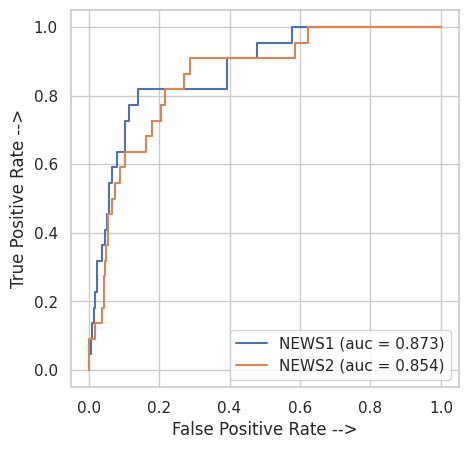

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(news_fpr, news_tpr,  label='NEWS1 (auc = %0.3f)' % auc_news)
plt.plot(news2_fpr, news2_tpr, label='NEWS2 (auc = %0.3f)' % auc_news2)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()